In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan = pd.read_csv("C:\\Users\\DHRUBAJIT\\Desktop\\AnalyticsVidhya\\Loan Prediction 3\\train.csv")
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#getting a copy of the dataset and adding a new column "count" = 1
loan1 = loan.copy()
loan1['count'] = 1

### Univariate Analysis

### Numerical
#### 1. Applicant Income

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


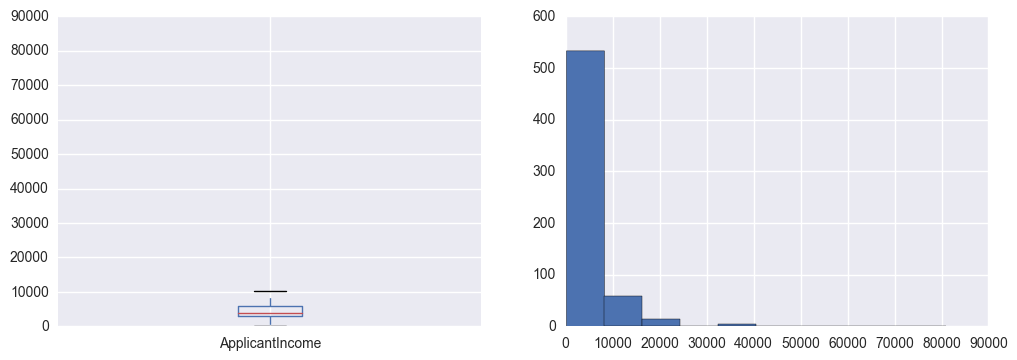

In [4]:
print(loan1.ApplicantIncome.describe())

plt.figure(figsize=[12,4])
plt.subplot(121)
loan1.boxplot(column='ApplicantIncome')

plt.subplot(122)
loan1['ApplicantIncome'].hist()

mean = 5403, standard deviation = 6109.

The std is too much, due to the presence of extreme outliers as seen in the boxplot and the histogram.

75% of the Income lies within 5800.

As we can see from the boxplot, few points are beyond 30,000. Lets find their z-score:

In [5]:
outlier_income = loan1[loan1['ApplicantIncome'] > 30000]
outlier_income

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,count
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,1
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,1
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,1
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,1
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,1
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,1
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,1


In [6]:
outliers_df = outlier_income.ApplicantIncome
score = []
for i in outliers_df:
    zscore = (i - 5403.459283)/(6109.041673)
    score.append(zscore)

applicantincome_score = pd.DataFrame({'Applicant_income': outlier_income.ApplicantIncome,
                                     'ZScore': score})
applicantincome_score

,Applicant_income,ZScore
155,39999,5.663006
171,51763,7.588676
183,33846,4.655811
185,39147,5.523541
333,63337,9.483245
409,81000,12.374533
443,37719,5.289789


These incomes are beyond 4 standard deviations from the mean. The highest point (i.e. 81000 income) is 12 standard deviations away.

We can call these points as extreme outliers and can be deleted for our model.

#### 2. Co-Applicant Income 

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


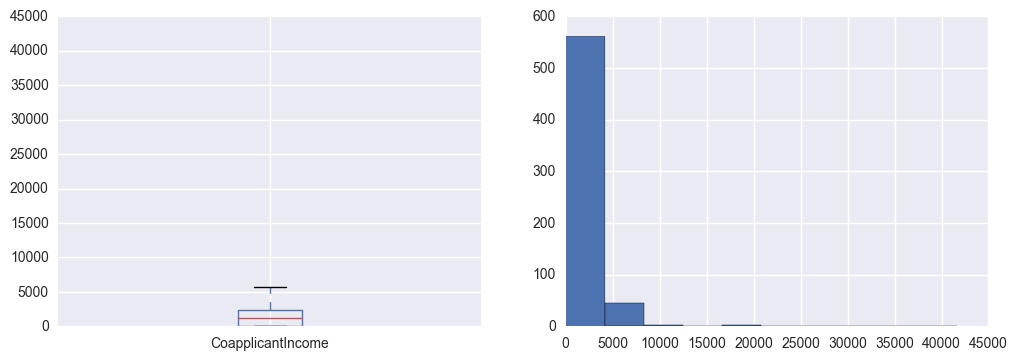

In [7]:
print(loan1.CoapplicantIncome.describe())

plt.figure(figsize=[12,4])
plt.subplot(121)
loan1.boxplot(column='CoapplicantIncome')

plt.subplot(122)
loan1['CoapplicantIncome'].hist()

mean = 1621, standard deviation = 2926.

The std of this column is too much, due to the presence of extreme outliers.

75% of the data lies within 2300.

Lets check the points which are beyond 10,000.

In [8]:
outlier_income1 = loan1[loan1['CoapplicantIncome'] > 10000]
outlier_income1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,count
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,1
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y,1
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,1
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,1
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,1


In [9]:
outliers_df1 = outlier_income1.CoapplicantIncome
score = []
for i in outliers_df1:
    zscore = (i - 1621.245798)/(2926.248369)
    score.append(zscore)

applicantincome_score1 = pd.DataFrame({'Coapplicant_income': outlier_income1.CoapplicantIncome,
                                     'ZScore': score})
applicantincome_score1

,Coapplicant_income,ZScore
9,10968.0,3.194108
177,11300.0,3.307564
402,20000.0,6.280654
417,20000.0,6.280654
581,33837.0,11.009234
600,41667.0,13.685015


The first 2 points are slightly above 3 standard deviations from the mean. They can be kept in our model.

But the rest of them are much farther away, above 6 std.

#### 3. Loan Amount

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


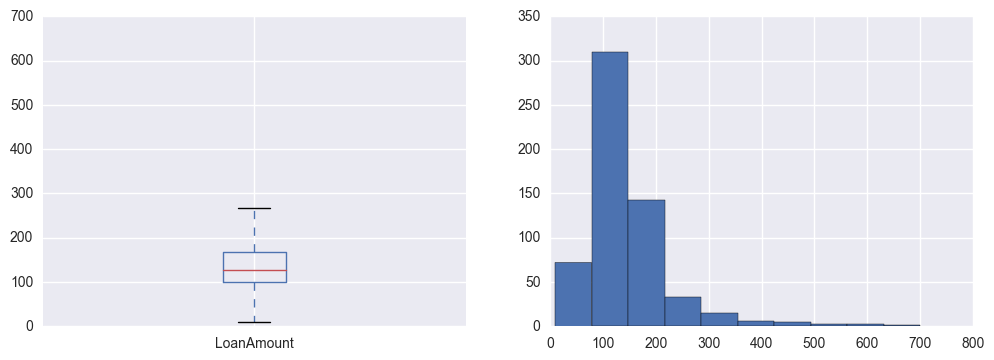

In [10]:
print(loan1.LoanAmount.describe())

plt.figure(figsize=[12,4])
plt.subplot(121)
loan1.boxplot(column='LoanAmount')

plt.subplot(122)
loan1['LoanAmount'].hist()

mean = 146, std = 86.

This distribution is positively skewed.

From the histogram, i can say that 90% of the data falls under 450. Lets calculate the z-score for those points beyond 450.

In [11]:
outlier_income2 = loan1[loan1['LoanAmount'] > 450]
outlier_income2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,count
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y,1
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,1
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,1
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,1
308,LP001996,Male,No,0,Graduate,No,20233,0.0,480.0,360.0,1.0,Rural,N,1
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,1
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N,1
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N,1
506,LP002624,Male,Yes,0,Graduate,No,20833,6667.0,480.0,360.0,NaN,Urban,Y,1
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y,1


In [12]:
outliers_df2 = outlier_income2.LoanAmount
score = []
for i in outliers_df2:
    zscore = (i - 146.412162)/(85.587325)
    score.append(zscore)

applicantincome_score2 = pd.DataFrame({'Loan_Amount': outlier_income2.LoanAmount,
                                     'ZScore': score})
applicantincome_score2

,Loan_Amount,ZScore
130,650.0,5.883907
155,600.0,5.299708
171,700.0,6.468105
177,495.0,4.072891
308,480.0,3.897631
333,490.0,4.014471
369,570.0,4.949189
487,500.0,4.131311
506,480.0,3.897631
523,480.0,3.897631


Yes, these are extreme outliers with standard deviations > 3.

### Categorical
#### 1. Gender

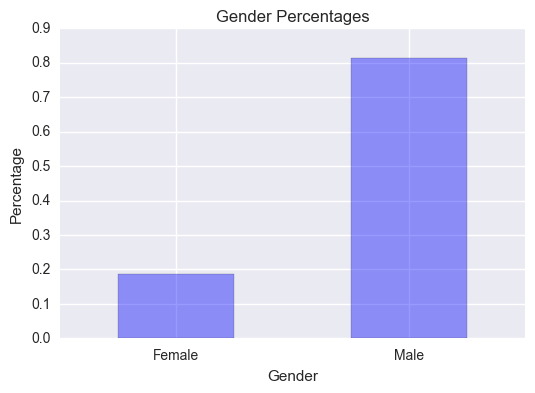

In [13]:
gender_count = loan1[['Gender','count']].groupby('Gender').sum()
gender_percent = gender_count.apply(lambda x: x/x.sum())

gender_percent.plot(kind='bar', color='blue', alpha=0.4, rot=0, legend=False, figsize=[6,4], grid=True)
plt.ylabel("Percentage")
plt.title("Gender Percentages")

#### 2. Married

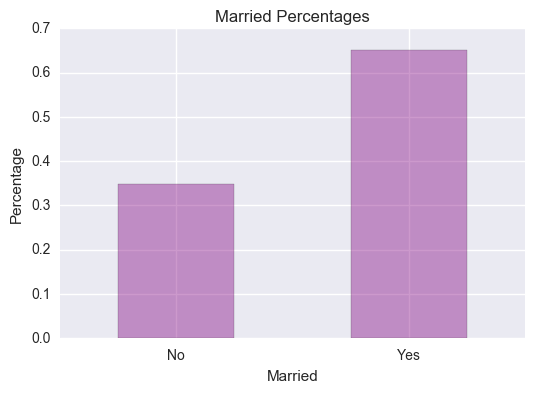

In [14]:
marr_count = loan1[['Married','count']].groupby('Married').sum()
marr_percent = marr_count.apply(lambda x: x/x.sum())

marr_percent.plot(kind='bar', color='purple', alpha=0.4, rot=0, legend=False, figsize=[6,4], grid=True)
plt.ylabel("Percentage")
plt.title("Married Percentages")

#### 3. Dependents

([<matplotlib.patches.Wedge at 0x28bdbae198>,
  <matplotlib.text.Text at 0x28bdbccf60>])

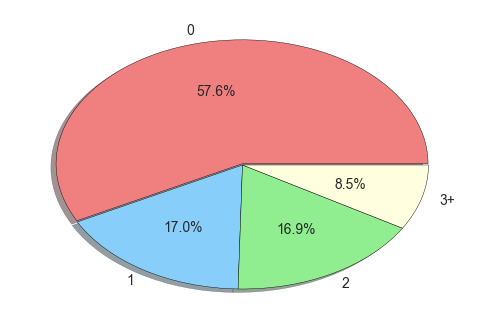

In [15]:
dep_count = loan1[['Dependents','count']].groupby('Dependents').sum()
dep_percent = dep_count.apply(lambda x: x/x.sum())

labels = ['0','1','2','3+']
colors = ['lightcoral','lightskyblue','lightgreen','lightyellow']
explode = (0.01,0,0,0)
plt.pie(dep_percent, colors=colors,autopct='%1.1f%%', labels=labels,explode=explode, shadow=True)

#### 4. Education

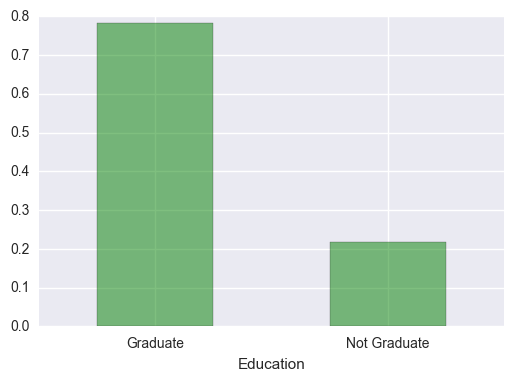

In [16]:
edu_count = loan1[['Education','count']].groupby('Education').sum()
edu_per = edu_count.apply(lambda x: x/x.sum())
edu_per.plot(kind='bar', color='green', alpha=0.5, rot=0, legend=False,figsize=[6,4], grid=True)

#### 5. Self_Employed

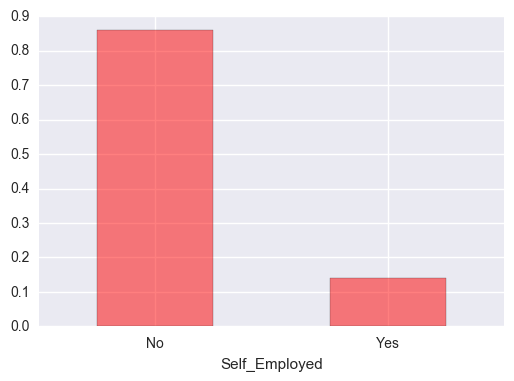

In [17]:
self_emp_count = loan1[['Self_Employed','count']].groupby('Self_Employed').sum()
self_per = self_emp_count.apply(lambda x: x/x.sum())
self_per.plot(kind='bar', color='red', alpha=0.5, rot=0, legend=False,figsize=[6,4], grid=True)

#### 6. Credit History

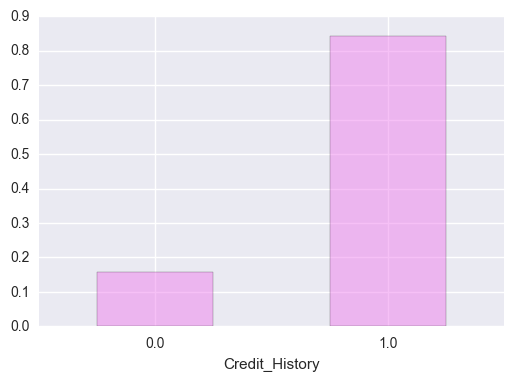

In [18]:
credit_count = loan1[['Credit_History','count']].groupby('Credit_History').sum()
credit_per = credit_count.apply(lambda x: x/x.sum())
credit_per.plot(kind='bar', color='violet', alpha=0.5, rot=0,legend=False,figsize=[6,4], grid=True)

#### 7. Property Area

([<matplotlib.patches.Wedge at 0x28bf096d30>,
  <matplotlib.text.Text at 0x28bf0b4278>])

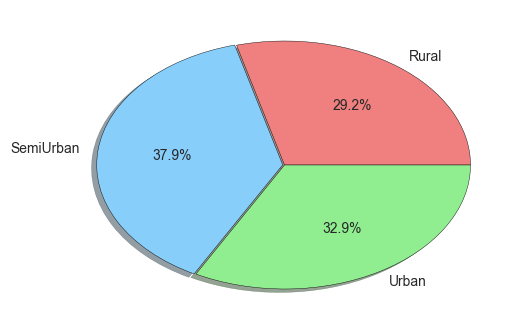

In [19]:
area_count = loan1[['Property_Area','count']].groupby('Property_Area').sum()
area_per = area_count.apply(lambda x: x/x.sum())

labels = ['Rural','SemiUrban','Urban']
colors = ['lightcoral','lightskyblue','lightgreen']
explode = (0,0.01,0)
plt.pie(area_per, colors=colors,autopct='%1.1f%%', labels=labels,explode=explode, shadow=True)

#### 8. Loan Amount Term

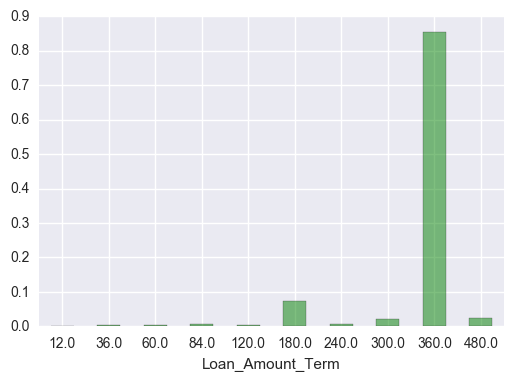

In [20]:
term_count = loan1[['Loan_Amount_Term','count']].groupby('Loan_Amount_Term').sum()
term_per= term_count.apply(lambda x: x/x.sum())
term_per.plot(kind='bar', color='green', alpha=0.5, rot=0,legend=False,figsize=[6,4], grid=True)

This feature has too many different types of loan terms. Expect the terms (180 and 360 months), others has very low count.

So it is better to divide this data into 3 types: 
1. Low Term  ---> less than 160
2. Medium Term ---> within 160 and 320
3. High Term ---> greater than 320

#### 9. Loan Status

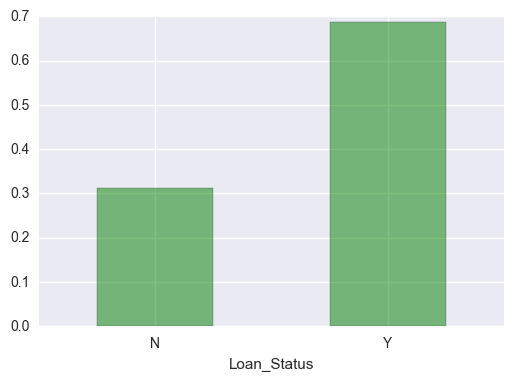

In [21]:
status_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
status_per = status_count.apply(lambda x: x/x.sum())
status_per.plot(kind='bar', color='green', alpha=0.5, rot=0, legend=False,figsize=[6,4], grid=True)

### Bivariate and Multivariate Analysis

#### Numerical features

#### 1. ApplicantIncome, CoapplicantIncome and LoanAmount

                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.116605    0.570909
CoapplicantIncome        -0.116605           1.000000    0.188619
LoanAmount                0.570909           0.188619    1.000000


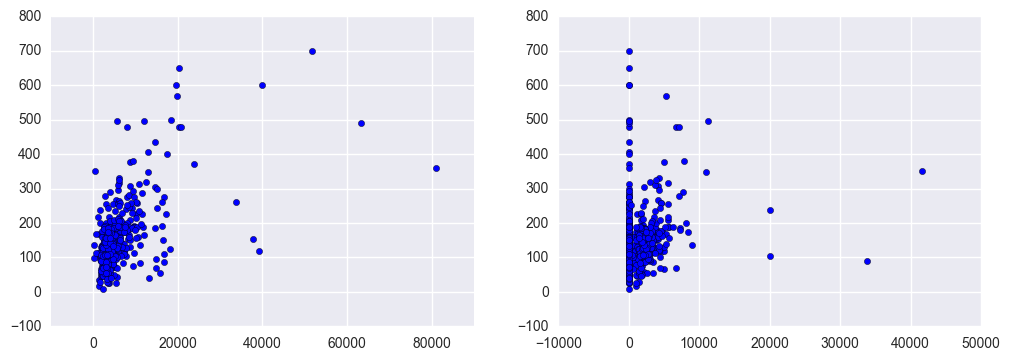

In [22]:
new_vars = loan1[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
print(new_vars.corr())

plt.figure(figsize=[12,4])
plt.subplot(121)
plt.scatter(loan1.ApplicantIncome, loan1.LoanAmount)

plt.subplot(122)
plt.scatter(loan1.CoapplicantIncome, loan1.LoanAmount)

In [23]:
#Removing outliers as discussed in Univariate analysis
loan_new = loan1.copy()
loan_new = loan_new[loan_new['ApplicantIncome'] < 30000]
loan_new = loan_new[loan_new['CoapplicantIncome'] < 10000]
loan_new = loan_new[loan_new['LoanAmount'] < 450]

                   ApplicantIncome  CoapplicantIncome  LoanAmount
ApplicantIncome           1.000000          -0.221145    0.522255
CoapplicantIncome        -0.221145           1.000000    0.269251
LoanAmount                0.522255           0.269251    1.000000


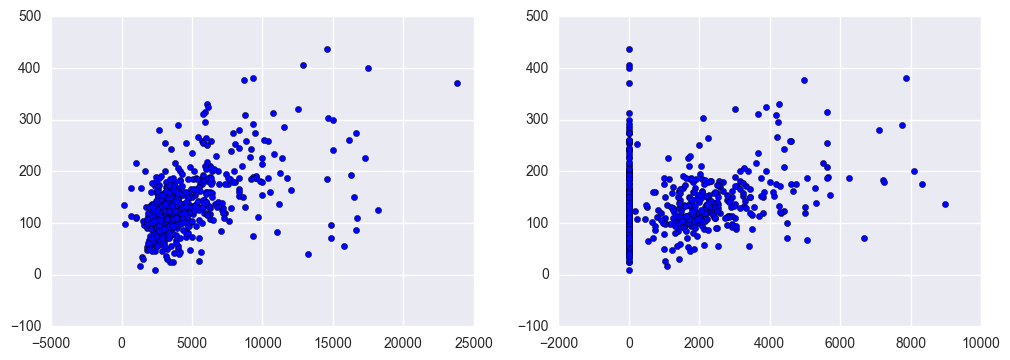

In [24]:
new_varss = loan_new[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
print(new_varss.corr())

plt.figure(figsize=[12,4])
plt.subplot(121)
plt.scatter(loan_new.ApplicantIncome, loan_new.LoanAmount)

plt.subplot(122)
plt.scatter(loan_new.CoapplicantIncome, loan_new.LoanAmount)

Relationship between both Incomes with the Loan Amount is fairly poor.

Initially ApplicantIncome had a correlation of .57, but decreased to .52 after deleting the outliers.

CoapplicantIncome had a correlation of .18, increased to .27 after deleting outliers.

#### Numerical-Categorical

#### 1. ApplicantIncome & CoapplicantIncome ---> Loan Status

In [25]:
loan_data = loan1.copy()
loan_data = loan_data[['Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount']]
loan_status_y = loan_data[loan_data['Loan_Status'] == 'Y']
loan_status_n = loan_data[loan_data['Loan_Status'] == 'N']
print("Loan Status == YES")
print(loan_status_y.describe())
print("-------------------------------------------------------")
print("Loan Status == NO")
print(loan_status_n.describe())

Loan Status == YES
       ApplicantIncome  CoapplicantIncome  LoanAmount
count       422.000000         422.000000  411.000000
mean       5384.068720        1504.516398  144.294404
std        5765.441615        1924.754855   85.484607
min         210.000000           0.000000   17.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1239.500000  126.000000
75%        5771.500000        2297.250000  161.000000
max       63337.000000       20000.000000  700.000000
-------------------------------------------------------
Loan Status == NO
       ApplicantIncome  CoapplicantIncome  LoanAmount
count       192.000000         192.000000  181.000000
mean       5446.078125        1877.807292  151.220994
std        6819.558528        4384.060103   85.862783
min         150.000000           0.000000    9.000000
25%        2885.000000           0.000000  100.000000
50%        3833.500000         268.000000  129.000000
75%        5861.250000        2273.750000  

By comparing both summaries, it is seen that there is no enough evidence that getting a loan or not getting a loan is purely based on Income Range or loan amount, as the means are almost same.

Although the standard deviations varies a lot, this is due to variation in count.

We need to conduct some statistical tests to determine whether there is actually any significance between the two groups.

#### 2. Education VS ApplicantIncome

Education == Graduate
       ApplicantIncome
count       480.000000
mean       5857.433333
std        6739.797954
min         150.000000
25%        2998.750000
50%        4000.000000
75%        6068.750000
max       81000.000000
--------------------------
Education == Not Graduate
       ApplicantIncome
count       134.000000
mean       3777.283582
std        2237.081586
min         210.000000
25%        2583.000000
50%        3357.500000
75%        4333.000000
max       18165.000000


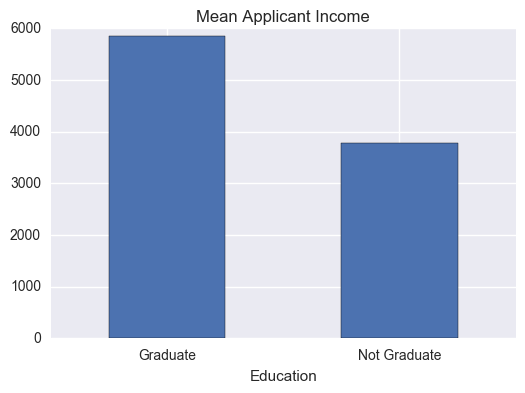

In [26]:
loan_data1 = loan1[['Education','ApplicantIncome']]
edu_graduate = loan_data1[loan_data1['Education'] == 'Graduate']
edu_notgraduate = loan_data1[loan_data1['Education'] == 'Not Graduate']
print("Education == Graduate")
print(edu_graduate.describe())
print("--------------------------")
print("Education == Not Graduate")
print(edu_notgraduate.describe())

edu_income = loan1[['Education','ApplicantIncome']].groupby('Education').mean()
edu_income.ApplicantIncome.plot(kind='bar',rot=0)
plt.title("Mean Applicant Income")

By comparing both the groups, initial assumption would be that a graduate has more chances of getting a higher salary than a non-graduate.

#### Categorical-Categorical

#### 1. Property Area VS Loan Status

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133


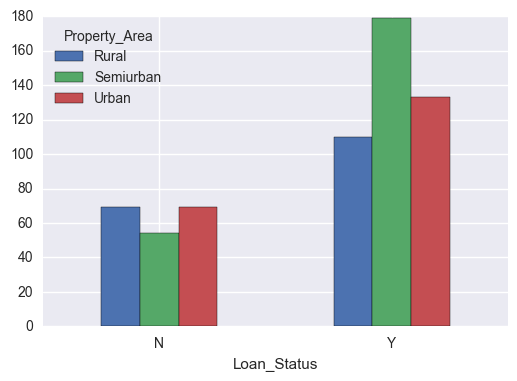

In [27]:
'''Question: is there an association between getting a Loan and the Property Area?'''

area_status = pd.crosstab(loan1.Loan_Status, loan1.Property_Area)
print(area_status)

area_status.plot(kind='bar', rot=0)

P(A):  the probability of getting a Loan
             Probability
Loan_Status             
N               0.312704
Y               0.687296
P(A|B): the probability of getting a loan, given the property area.
Property_Area     Rural  Semiurban     Urban
Loan_Status                                 
N              0.385475    0.23176  0.341584
Y              0.614525    0.76824  0.658416


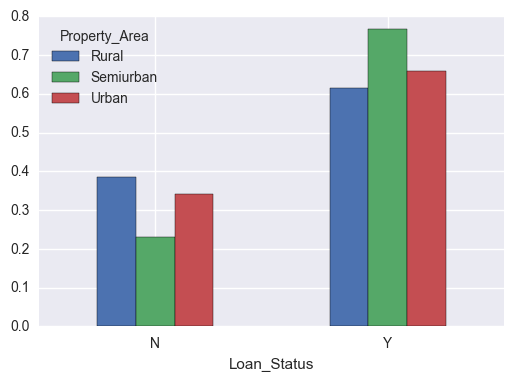

In [28]:
print("P(A):  the probability of getting a Loan")
loan_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
loan_prob = loan_count.apply(lambda x: x/x.sum()).rename(columns={'count':'Probability'})
print(loan_prob)
print("==================================================================")
print("P(A|B): the probability of getting a loan, given the property area.")
area_status_prob = area_status.apply(lambda x: x/x.sum())
print(area_status_prob)
print('==================================================================')
area_status_prob.plot(kind='bar',rot=0)

Since, P(A) != P(A/B), we can conclude that there is an association between getting a loan and the property area. The 
probability of getting a loan, regardless of property area, is  68.7%. 

However, examination of a contingency table containing both Loan Status and Property area showed that the conditional probability of getting a loan changes by property area. 

Visual examination of the barplot shows the conditional probabilities of getting a lon are not equal 
across Property areas.

#### 2. Credit History VS Loan Status

Credit_History  0.0  1.0
Loan_Status             
N                82   97
Y                 7  378


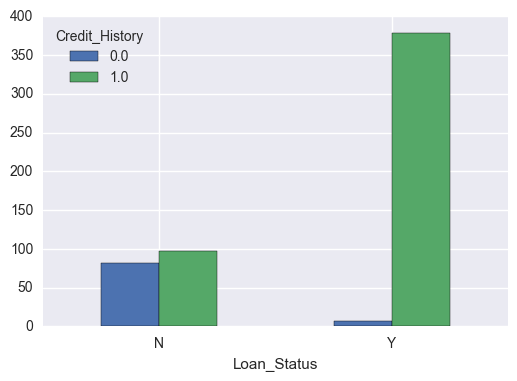

In [29]:
'''Question: is there an association between getting a Loan and Credit History?'''

credit_status = pd.crosstab(loan1.Loan_Status, loan1.Credit_History)
print(credit_status)

credit_status.plot(kind='bar', rot=0)

P(A):  the probability of getting a Loan
             Probability
Loan_Status             
N               0.312704
Y               0.687296
P(A|B): the probability of getting a loan, given the Credit History.
Credit_History       0.0       1.0
Loan_Status                       
N               0.921348  0.204211
Y               0.078652  0.795789


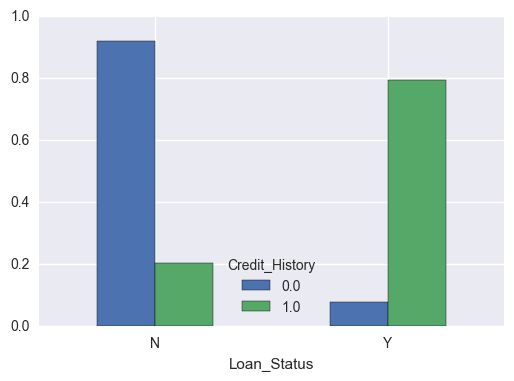

In [30]:
print("P(A):  the probability of getting a Loan")
loan_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
loan_prob = loan_count.apply(lambda x: x/x.sum()).rename(columns={'count':'Probability'})
print(loan_prob)
print("==================================================================")
print("P(A|B): the probability of getting a loan, given the Credit History.")
credit_status_prob = credit_status.apply(lambda x: x/x.sum())
print(credit_status_prob)

credit_status_prob.plot(kind='bar',rot=0)

Since, P(A) != P(A/B), there is an association between getting a loan and the credit history. The probability of getting a loan, regardless of credit history, is  68.7%. 

However, conditional probability showed that getting a loan changes by property area. 

From the barplot, it is very clear that those customers who have a credit card stands a better chance for getting a loan.
We will do some statistical tests to confirm these assumption later. 

#### 3. Education VS Loan_Status

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


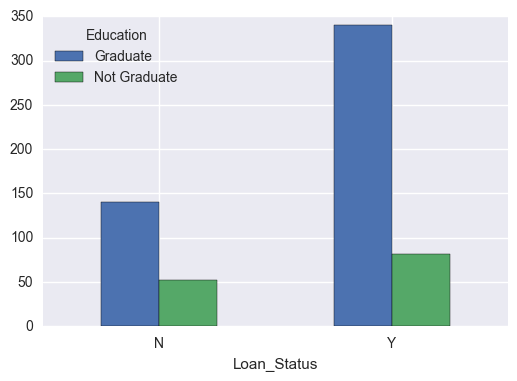

In [31]:
'''Question: is there an association between getting a Loan and Education?'''

edu_status = pd.crosstab(loan1.Loan_Status, loan1.Education)
print(edu_status)

edu_status.plot(kind='bar', rot=0)

P(A):  the probability of getting a Loan
             Probability
Loan_Status             
N               0.312704
Y               0.687296
P(A|B): the probability of getting a loan, given the Education.
Education    Graduate  Not Graduate
Loan_Status                        
N            0.291667       0.38806
Y            0.708333       0.61194


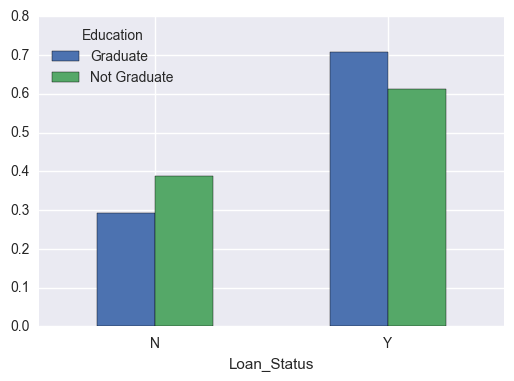

In [32]:
print("P(A):  the probability of getting a Loan")
loan_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
loan_prob = loan_count.apply(lambda x: x/x.sum()).rename(columns={'count':'Probability'})
print(loan_prob)
print("==================================================================")
print("P(A|B): the probability of getting a loan, given the Education.")
edu_status_prob = edu_status.apply(lambda x: x/x.sum())
print(edu_status_prob)

edu_status_prob.plot(kind='bar',rot=0)

Since, P(A) != P(A/B), there is an association between getting a loan and the Education.

#### 4. Loan Amount Term VS Loan Status

Term_bins    low  medium  high
Loan_Status                   
N              3      21   162
Y              9      40   365


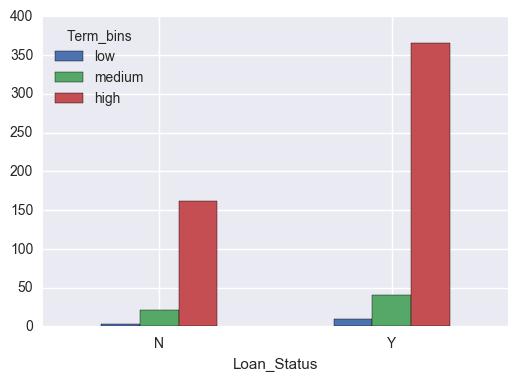

In [33]:
'''Question: is there an association between getting a Loan and Loan Amount Term?'''

#lets divide this column into 3 parts:
loan1['Term_bins'] = pd.cut(loan1.Loan_Amount_Term, bins=[0,160,320,500], labels=['low','medium','high'])
term_status = pd.crosstab(loan1.Loan_Status, loan1.Term_bins)
print(term_status)

term_status.plot(kind='bar', rot=0)

P(A):  the probability of getting a Loan
             Probability
Loan_Status             
N               0.312704
Y               0.687296
P(A|B): the probability of getting a loan, given the Lern Term.
Term_bins     low    medium    high
Loan_Status                        
N            0.25  0.344262  0.3074
Y            0.75  0.655738  0.6926


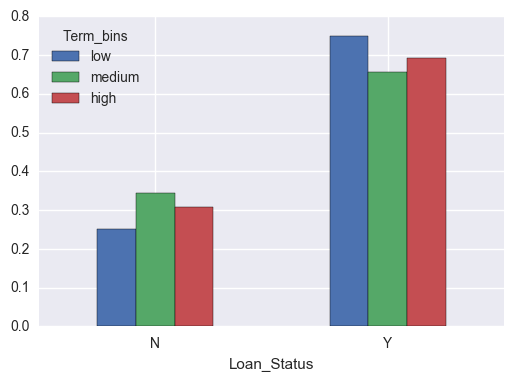

In [34]:
print("P(A):  the probability of getting a Loan")
status_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
status_prob = loan_count.apply(lambda x: x/x.sum()).rename(columns={'count':'Probability'})
print(status_prob)
print("==================================================================")
print("P(A|B): the probability of getting a loan, given the Lern Term.")
term_status_prob = term_status.apply(lambda x: x/x.sum())
print(term_status_prob)

term_status_prob.plot(kind='bar',rot=0)

There seems to be an association. This needs to be confirmed with some statistical tests.

#### 5. Dependents VS Loan Status

Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


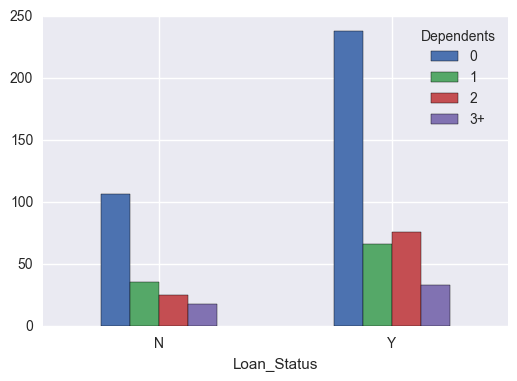

In [35]:
'''Question: is there an association between getting a Loan and Dependents?'''

dep_status = pd.crosstab(loan1.Loan_Status, loan1.Dependents)
print(dep_status)

dep_status.plot(kind='bar', rot=0)

P(A):  the probability of getting a Loan
             Probability
Loan_Status             
N               0.312704
Y               0.687296
P(A|B): the probability of getting a loan, given Dependents.
Dependents          0         1         2        3+
Loan_Status                                        
N            0.310145  0.352941  0.247525  0.352941
Y            0.689855  0.647059  0.752475  0.647059


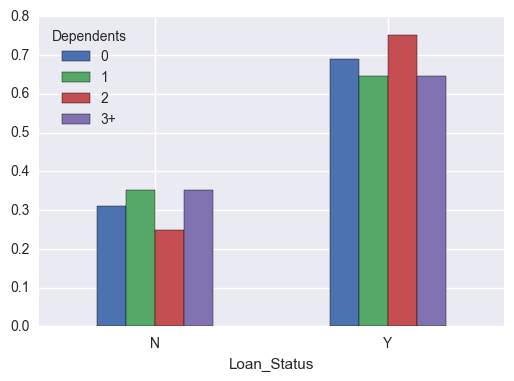

In [36]:
print("P(A):  the probability of getting a Loan")
status_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
status_prob = loan_count.apply(lambda x: x/x.sum()).rename(columns={'count':'Probability'})
print(status_prob)
print("==================================================================")
print("P(A|B): the probability of getting a loan, given Dependents.")
dep_status_prob = dep_status.apply(lambda x: x/x.sum())
print(dep_status_prob)

dep_status_prob.plot(kind='bar',rot=0)

Expect Dependents == 0, others seems to have an association.

#### 6. Self Employed VS Loan Status

Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


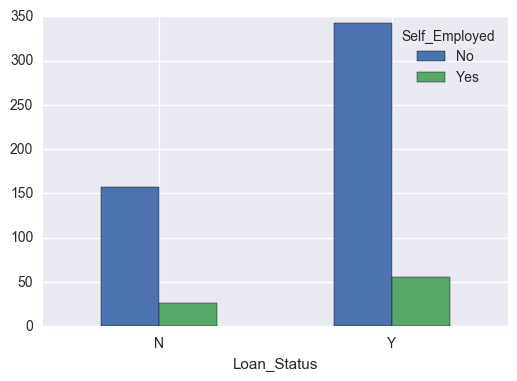

In [51]:
'''Question: is there an association between getting a Loan and Self Employment?'''

emp_status = pd.crosstab(loan1.Loan_Status, loan1.Self_Employed)
print(emp_status)

emp_status.plot(kind='bar', rot=0)

P(A):  the probability of getting a Loan
             Probability
Loan_Status             
N               0.312704
Y               0.687296
P(A|B): the probability of getting a loan, given Self Employment.
Self_Employed     No       Yes
Loan_Status                   
N              0.314  0.317073
Y              0.686  0.682927


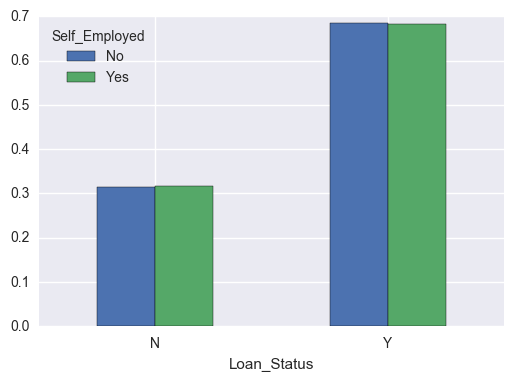

In [52]:
print("P(A):  the probability of getting a Loan")
status_count = loan1[['Loan_Status','count']].groupby('Loan_Status').sum()
status_prob = loan_count.apply(lambda x: x/x.sum()).rename(columns={'count':'Probability'})
print(status_prob)
print("==================================================================")
print("P(A|B): the probability of getting a loan, given Self Employment.")
emp_status_prob = emp_status.apply(lambda x: x/x.sum())
print(emp_status_prob)

emp_status_prob.plot(kind='bar',rot=0)

### Hypothesis Testing

#### 1. Property Area VS Loan_Status

In [44]:
'''As we saw in Bivariate Analysis that the conditional probability of getting a loan is not equal across different property 
area. So now we need to conduct a statistical test to confirm this assumption.'''

'''
Null hypothesis: every property area has eqaul chances of getting a loan
Alternate      : not equal chances
'''
area_status = pd.crosstab(loan1.Loan_Status, loan1.Property_Area)
print(area_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(area_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 69         54     69
Y                110        179    133
-----------------------------------------
Chi2 statistics:
Chi2 = 12.297623
p-value = 0.002136


#### 2. Credit_History VS Loan_Status

In [45]:
'''As we saw in Bivariate Analysis that the conditional probability of getting a loan is not equal across different credit 
history. So now we need to conduct a statistical test to confirm this assumption.'''

'''
Null hypothesis: equal chances of getting a loan for different credit history
Alternate      : not equal chances
'''
credit_status = pd.crosstab(loan1.Loan_Status, loan1.Credit_History)
print(credit_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(credit_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

Credit_History  0.0  1.0
Loan_Status             
N                82   97
Y                 7  378
-----------------------------------------
Chi2 statistics:
Chi2 = 177.932047
p-value = 0.000000


#### 3. Education VS Loan_Status

In [46]:
'''
Null hypothesis: equal chances of getting a loan for different education background
Alternate      : not equal chances
'''
edu_status = pd.crosstab(loan1.Loan_Status, loan1.Education)
print(edu_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(edu_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82
-----------------------------------------
Chi2 statistics:
Chi2 = 4.528893
p-value = 0.033327


#### 4. Loan Amount Term VS Loan Status 

In [48]:
'''Earlier we divided the Loan Amount Term into 3 categories and through bivariate tests we assumed that there is actually
an association with gettinfg a loan. Lets confirm that assumption.'''

'''
Null hypothesis: equal chances of getting a loan for different Loan Term 
Alternate      : not equal chances
'''
term_status = pd.crosstab(loan1.Loan_Status, loan1.Term_bins)
print(term_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(term_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

Term_bins    low  medium  high
Loan_Status                   
N              3      21   162
Y              9      40   365
-----------------------------------------
Chi2 statistics:
Chi2 = 0.553388
p-value = 0.758287


#### 5. Dependents VS Loan Status

In [50]:
'''Earlier we found that except dependents = 0, others had an association with with Loan Status.'''
'''
Null hypothesis: equal chances of getting a loan for different no. of Dependents 
Alternate      : not equal chances
'''
dep_status = pd.crosstab(loan1.Loan_Status, loan1.Dependents)
print(dep_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(dep_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33
-----------------------------------------
Chi2 statistics:
Chi2 = 3.158340
p-value = 0.367851


#### 6. Self Eemployed VS Loan Status

In [53]:
'''Earlier we assumed that there is no association between Self_Employed and Loan Status.'''
'''
Null hypothesis: equal chances of getting a loan for Self_employment 
Alternate      : not equal chances
'''
emp_status = pd.crosstab(loan1.Loan_Status, loan1.Self_Employed)
print(emp_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(emp_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56
-----------------------------------------
Chi2 statistics:
Chi2 = 0.003086
p-value = 0.955696


#### 7. ApplicantIncome VS Loan_Status

In [55]:
'''As seen in Bivariate test, we assumed that there is no significant difference between the means of Applicant's Income for both
groups of Loan_Status.'''
'''
Null Hypothesis: customers with loan_status == yes and those whose loan_status == no, have equal mean Income.
Alternate      : not equal
'''

appIncome_yes = loan1[loan1['Loan_Status'] == 'Y']
appIncome_no = loan1[loan1['Loan_Status'] == 'N']

appIncome_yes = appIncome_yes.ApplicantIncome
appIncome_no = appIncome_no.ApplicantIncome

t, p = stats.ttest_ind(appIncome_yes,appIncome_no)
print("t-stats = %f" %(t))
print("p-value = %f" %(p))

t-stats = -0.116508
p-value = 0.907288


In [67]:
'''Now lets delete the outliers and conduct the t-test again.'''
appIncome_yes1 = loan_new[loan_new['Loan_Status'] == 'Y']
appIncome_no1 = loan_new[loan_new['Loan_Status'] == 'N']

appIncome_yes1 = appIncome_yes1.ApplicantIncome
appIncome_no1 = appIncome_no1.ApplicantIncome

t, p = stats.ttest_ind(appIncome_yes1,appIncome_no1)
print("t-stats = %f" %(t))
print("p-value = %f" %(p))

t-stats = 0.443898
p-value = 0.657285


In [65]:
'''Now lets divide the Applicant's Income into 3 parts and conduct a chi2 test to find an actual significance.'''
loan_new1 = loan1.copy()
loan_new1['ApplicantIncome_bins'] = pd.cut(loan_new1['ApplicantIncome'], bins=[0,3000,6000, 82000], labels=['low','medium','high'])

income_bins_status = pd.crosstab(loan_new1.Loan_Status, loan_new1.ApplicantIncome_bins)
print(income_bins_status)
print("-----------------------------------------")
print("Chi2 statistics:")
from scipy import stats 
chi2,p,df, arr = stats.chi2_contingency(income_bins_status, correction=False)
print("Chi2 = %f" %(chi2))
print("p-value = %f" %(p))

ApplicantIncome_bins  low  medium  high
Loan_Status                            
N                      54      92    46
Y                     123     208    91
-----------------------------------------
Chi2 statistics:
Chi2 = 0.437731
p-value = 0.803430


#### 8. CoapplicantIncome VS Loan_Status

In [57]:
'''As seen in Bivariate test, we assumed that there is no significant difference between the means of Coapplicant's Income for both
groups of Loan_Status.'''
'''
Null Hypothesis: customers with loan_status == yes and those whose loan_status == no, have equal mean Coapp. Income.
Alternate      : not equal
'''

coappIncome_yes = loan1[loan1['Loan_Status'] == 'Y']
coappIncome_no = loan1[loan1['Loan_Status'] == 'N']

coappIncome_yes = coappIncome_yes.CoapplicantIncome
coappIncome_no = coappIncome_no.CoapplicantIncome

t, p = stats.ttest_ind(coappIncome_yes,coappIncome_no)
print("t-stats = %f" %(t))
print("p-value = %f" %(p))

t-stats = -1.466785
p-value = 0.142948


#### 9. Loan Amount VS Loan_Status

In [63]:
'''As seen in Bivariate test, we assumed that there is no significant difference between the means of Loan Amount for both
groups of Loan_Status.'''
'''
Null Hypothesis: customers with loan_status == yes and those whose loan_status == no, have equal mean LoanAmount.
Alternate      : not equal
'''

amount_yes = loan1[loan1['Loan_Status'] == 'Y']
amount_no = loan1[loan1['Loan_Status'] == 'N']

amount_yes = amount_yes.LoanAmount.dropna()
amount_no = amount_no.LoanAmount.dropna()

t, p = stats.ttest_ind(amount_yes,amount_no)
print("t-stats = %f" %(t))
print("p-value = %f" %(p))

t-stats = -0.907077
p-value = 0.364736
